We will position-averaged simulate convergent beam electron diffraction (PACBED) patterns for Dicalcium aluminium alumosilicate (http://www.crystallography.net/cod/1000048.html). This calculation ran in 22 seconds on my home 2 GB NVIDIA GTX 750 Ti and 5 min 22 seconds on my Intel i5 CPU.

0.22677151244628693 0.15000000000000002 0.9950604438781738 0.97
0.15495665765148828 0.15000000000000002 0.9966495037078857 0.97
0.11760517241489503 0.15000000000000002 0.996269702911377 0.97


Frozen phonon iteration:   0%|          | 0/10 [00:00<?, ?it/s]

Making projected potentials:   0%|          | 0/5 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

Defocus series:   0%|          | 0/1 [00:00<?, ?it/s]

Probe positions:   0%|          | 0/29 [00:00<?, ?it/s]

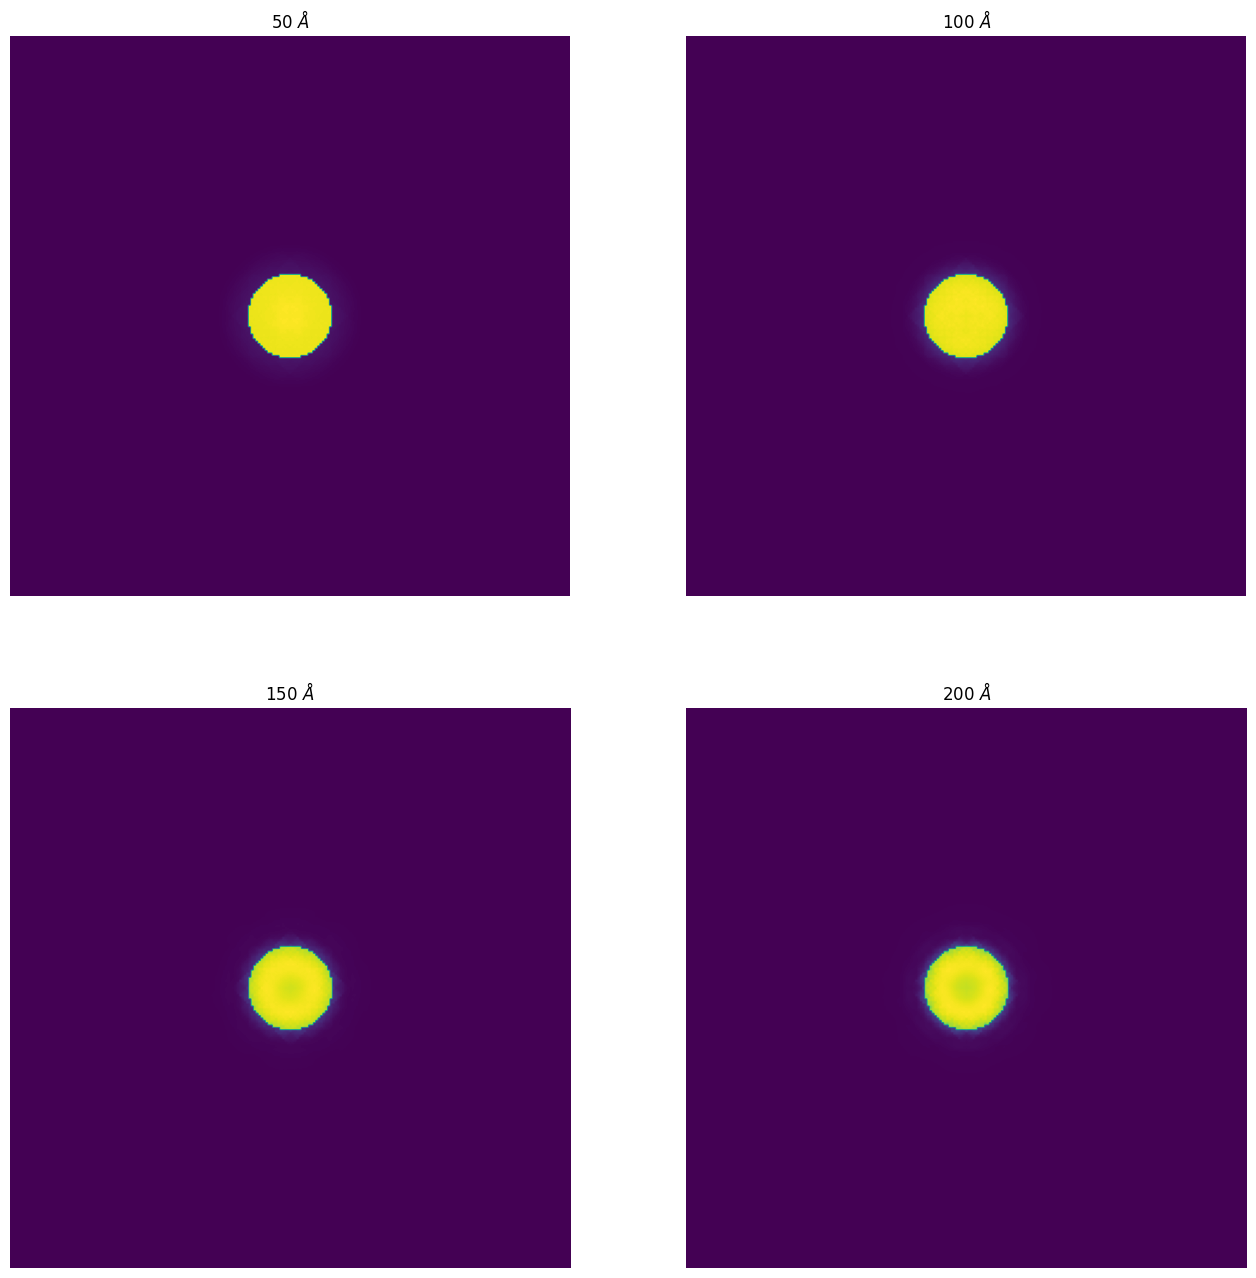

In [2]:
import pyms
import numpy as np
import torch

# Get crystal
crystal = pyms.structure.fromfile('Structures/1000048.p1',temperature_factor_units='B')

# Quick plot of crystal
# crystal.quickplot()

# Probe accelerating voltage in eV
eV = 3e5

# Probe forming aperture in mrad
app = 15 

# Set up thickness series (up to a 1000 Angstrom in steps of 100 Angstrom)
tstep = 50
thicknesses = np.arange(tstep,201,tstep)
    
output = pyms.PACBED(
    crystal,
    eV,
    app,
    thicknesses,
    showProgress='notebook'
)

#Now plot results
import matplotlib.pyplot as plt
%matplotlib inline
nrows = int(np.ceil(np.sqrt(output.shape[0])))
fig,axes = plt.subplots(nrows=nrows,ncols=nrows,figsize=(16,16))
for ax in axes.ravel():
    ax.set_axis_off()
for i,out in enumerate(output):
    ax = axes.ravel()[i]
    ax.imshow(out)
    ax.set_title('{0} $\\AA$'.format(thicknesses[i]))